In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv("SuperStore_Sales_Dataset.csv")

In [3]:
#First five rows 
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [ ]:
#Column name present in the dataset
df.columns.tolist()

['Row ID+O6G3A1:R6',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Profit',
 'Returns',
 'Payment Mode',
 'ind1',
 'ind2']

In [ ]:
#Checking the null values
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

In [7]:
#Number of rows and column in the dataset 
df.shape

(5901, 23)

In [8]:
#Datatype of the column
df.dtypes

Row ID+O6G3A1:R6      int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Customer Name        object
Segment              object
Country              object
City                 object
State                object
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Profit              float64
Returns             float64
Payment Mode         object
ind1                float64
ind2                float64
dtype: object

In [10]:
#Rename the first column
df=df.rename(columns={'Row ID+O6G3A1:R6':'Row ID' })

In [11]:
#Drop columns with  null values
df=df.drop(columns=['ind1','ind2'])

In [16]:
#Convert date columns to datetime objects
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')

In [17]:
# Handle missing values in 'Returns' by filling NaN with 0 and creating a flag
df['Returns']=df['Returns'].fillna(0).astype(int)
df['Is_Returned']=df['Returns'].apply(lambda x:1 if x>0 else 0)

In [18]:
#Feature Engineering
df['Order Year']=df['Order Date'].dt.year
df['Order Processing Time(Days)']=(df['Ship Date']-df['Order Date']).dt.days

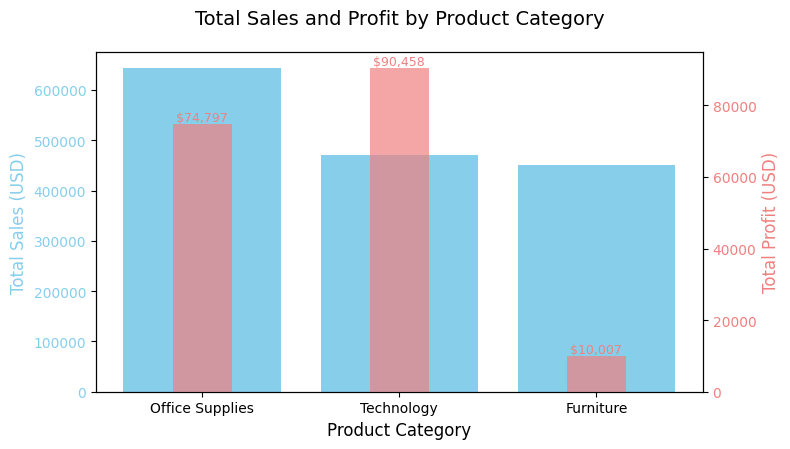

In [ ]:
# Calculate Sales and Profit by Category
category_performance = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Sales Bar Plot (Primary Y-axis)
ax1.bar(category_performance['Category'], category_performance['Total_Sales'], color='skyblue', label='Total Sales')
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Total Sales (USD)', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Total Sales and Profit by Product Category', fontsize=14, pad=20)
ax1.ticklabel_format(style='plain', axis='y')

# Second Y-axis for Profit
ax2 = ax1.twinx()
profit_bars = ax2.bar(category_performance['Category'], category_performance['Total_Profit'],
                      color='lightcoral', alpha=0.7, width=0.3, label='Total Profit')
ax2.set_ylabel('Total Profit (USD)', color='lightcoral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Add annotations for Profit values
for bar in profit_bars:
    yval = bar.get_height()
    va_align = 'bottom' if yval > 0 else 'top'
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.0f}',
             ha='center', va=va_align, fontsize=9, color='lightcoral')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Insight (Profit Driver): Office Supplies generates the highest total profit (~76K), despite having the lowest sales volume, indicating a strong margin and efficiency.

Insight (Inefficiency): Furniture is the most inefficient category, with the second-highest sales but the lowest total profit (~13K).

Recommendation:Stop losing so much money on Furniture. It brings in sales, but costs too much to deliver and support. Raise prices or reduce discounts specifically for Furniture to make sure we earn more than we spend.

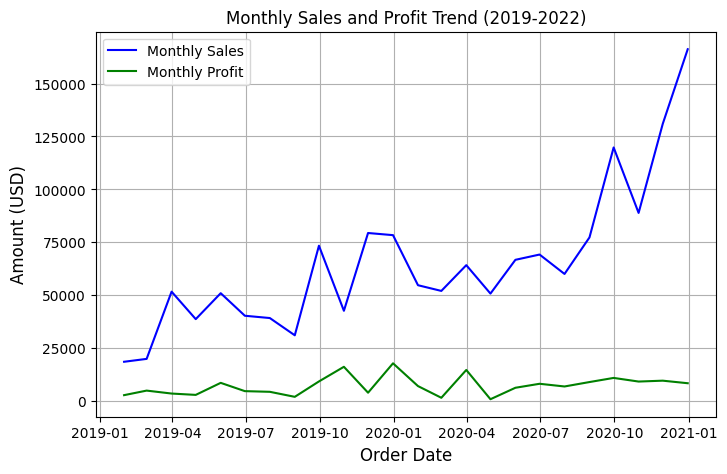

In [ ]:
# Aggregate data by month for trend analysis
sales_trend = df.set_index('Order Date').resample('ME').agg(
    Monthly_Sales=('Sales', 'sum'),
    Monthly_Profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=sales_trend, x='Order Date', y='Monthly_Sales', label='Monthly Sales', color='blue')
sns.lineplot(data=sales_trend, x='Order Date', y='Monthly_Profit', label='Monthly Profit', color='green')
plt.title('Monthly Sales and Profit Trend (2019-2022)')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Amount (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Insight (Seasonality): Sales and profit consistently exhibit strong seasonality, peaking sharply in Q4 (November/December) every year.

Insight (Volatility): The Profit line shows high volatility and dips close to the break-even point during Q1.

Recommendation: Go all-in on the holiday season (November/December). Plan bigger promotions and have more products ready. During the slow start of the year (Q1), cut non-essential spending to keep profits stable.

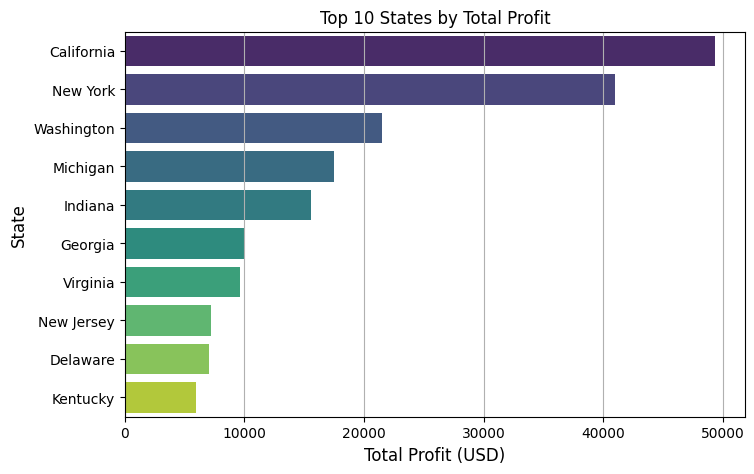

In [ ]:
# Calculate total profit per state and select the top 10
state_profit = df.groupby('State')['Profit'].sum().nlargest(10).reset_index()

plt.figure(figsize=(8, 5))
# Corrected line to avoid the future deprecation warning
sns.barplot(data=state_profit, x='Profit', y='State', hue='State', palette='viridis', legend=False)
plt.title('Top 10 States by Total Profit')
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x')
plt.show()


Insight (Dominance): California is the overwhelmingly dominant profit center, generating significantly more profit than all other states combined.

Insight (Key Markets): Profitability is highly concentrated; New York and Washington are crucial secondary markets.

Recommendation: Treat California like our MVP (Most Valuable Player). Invest more money and effort there to keep it growing. Also, look at what makes California so successful and try to copy those strategies in other promising states.

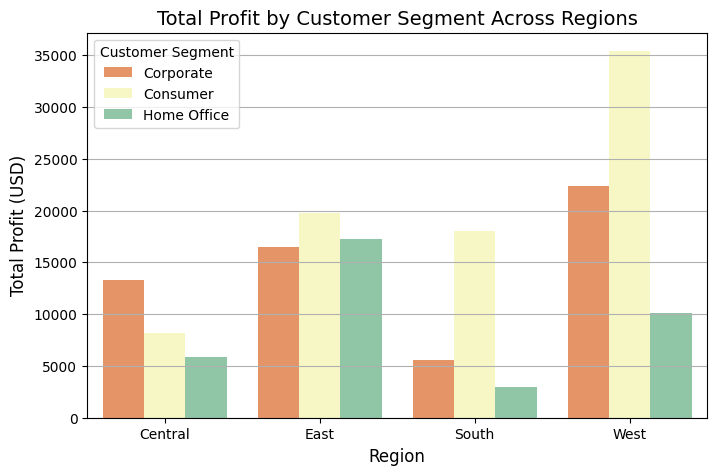

In [ ]:
# Calculate total profit by Segment and Region
segment_region_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()
segment_region_profit = segment_region_profit.sort_values(by=['Region', 'Profit'], ascending=[True, False])

plt.figure(figsize=(8, 5))
# Create a grouped bar chart
sns.barplot(data=segment_region_profit, x='Region', y='Profit', hue='Segment', palette='Spectral')

plt.title('Total Profit by Customer Segment Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
plt.legend(title='Customer Segment', loc='upper left')
plt.grid(axis='y')
plt.show()


Insight (Universal Leader): The Consumer segment is the largest profit contributor in all four regions, making it the most reliable target demographic.

Insight (Regional Weakness): The South region consistently delivers the lowest absolute profit across all segments.

Recommendation: Focus most of our marketing money on the 'Consumer' segment. They are our most profitable customers everywhere. Also, investigate the South region immediately—it is consistently the worst performer and needs fixing or abandoning.

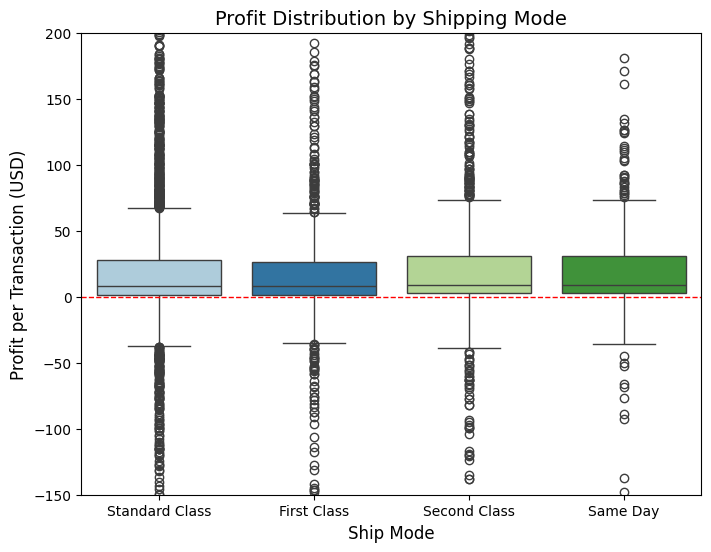

In [ ]:
#Profit Distribution by Ship Mode 

plt.figure(figsize=(8, 6))
# Create a Box Plot
sns.boxplot(data=df, x='Ship Mode', y='Profit', hue='Ship Mode', palette='Paired', legend=False)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Profit Distribution by Shipping Mode', fontsize=14)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Profit per Transaction (USD)', fontsize=12)
plt.ylim(-150, 200)
plt.show()


Insight (Stability): Standard Class has the highest median profit and the lowest variability, making it the most stable and reliable shipping method.

Insight (Risk): First Class and Same Day modes exhibit a higher frequency of transaction-level losses (negative outliers).

Recommendation: Add a higher fee (surcharge) for all fast shipping. Quick options like 'First Class' and 'Same Day' are often causing us to lose money on those orders. The fee must cover the higher costs to ensure we make a profit every time.

In [49]:
# Save the cleaned DataFrame to a new CSV file for SQL and Power BI
df.to_csv("SuperStore_Cleaned.csv", index=False)